In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('/Users/avkar/PycharmProjects/FinalYearProject/venv/Datasets/cleaned_eda_dataset.csv')

# Unique Fighters

In [13]:
red_fighters = df['RedFighter']
blue_fighters = df['BlueFighter']
all_fighters = pd.concat([red_fighters, blue_fighters], ignore_index=True)
all_fighters.nunique()
male_fights = df[df['Gender'] == 'MALE']
male_fighters = pd.concat([male_fights['RedFighter'], male_fights['BlueFighter']], ignore_index=True).drop_duplicates().reset_index(drop = True)
female_fights = df[df['Gender'] == 'FEMALE']
female_fighters = pd.concat([female_fights['RedFighter'], female_fights['BlueFighter']], ignore_index=True).drop_duplicates().reset_index(drop = True)

print('Unique Male Fighters: {} '.format(len(male_fighters)))
print('Unique Female Fighters: {} '.format(len(female_fighters)))

Unique Male Fighters: 1654 
Unique Female Fighters: 239 


In [14]:
overlapping_fighters = set(male_fighters).intersection(set(female_fighters))
print(f"Fighters appearing in both genders: {len(overlapping_fighters)}")
print(overlapping_fighters)


Fighters appearing in both genders: 9
{'Chelsea Chandler', 'Angela Hill', 'Zarah Fairn', 'Jacqueline Cavalcanti', 'Macy Chiasson', 'Emily Ducote', 'Irene Aldana', 'Loopy Godinez', 'Julija Stoliarenko'}


In [15]:
# Drop rows where overlapping fighters appear as male
df_remove_overlap = df[~((df['Gender'] == 'MALE') & (df['RedFighter'].isin(overlapping_fighters))) & 
                ~((df['Gender'] == 'MALE') & (df['BlueFighter'].isin(overlapping_fighters)))]

# check the size of the cleaned DataFrame
print(f"Original DataFrame size: {len(df)}")
print(f"Cleaned DataFrame size: {len(df_remove_overlap)}")


df_remove_overlap = df_remove_overlap.reset_index(drop=True)



Original DataFrame size: 4944
Cleaned DataFrame size: 4939


# Total Fights per weightclass

/var/folders/g7/d5vdjz6s1vl8ksk5tqs00s_c0000gn/T/ipykernel_50905/3666571816.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


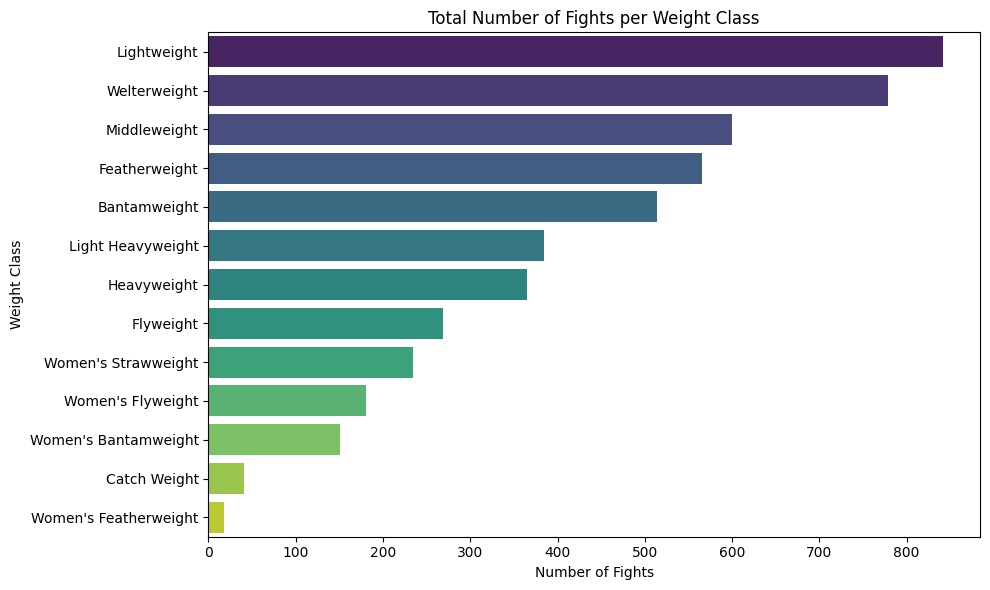

In [16]:
# Count the total number of fights per weight class
fights_per_weight_class = df['WeightClass'].value_counts().reset_index()
fights_per_weight_class.columns = ['WeightClass', 'TotalFights']

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(
    x='TotalFights', 
    y='WeightClass', 
    data=fights_per_weight_class, 
    palette='viridis'
)
plt.title('Total Number of Fights per Weight Class')
plt.xlabel('Number of Fights')
plt.ylabel('Weight Class')
plt.tight_layout()
plt.show()


# Strike Statistics

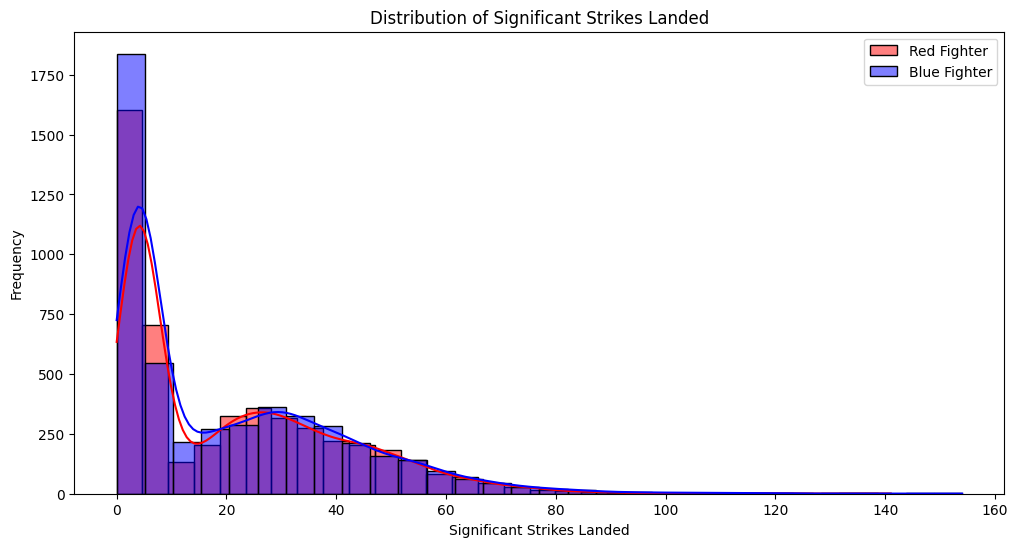

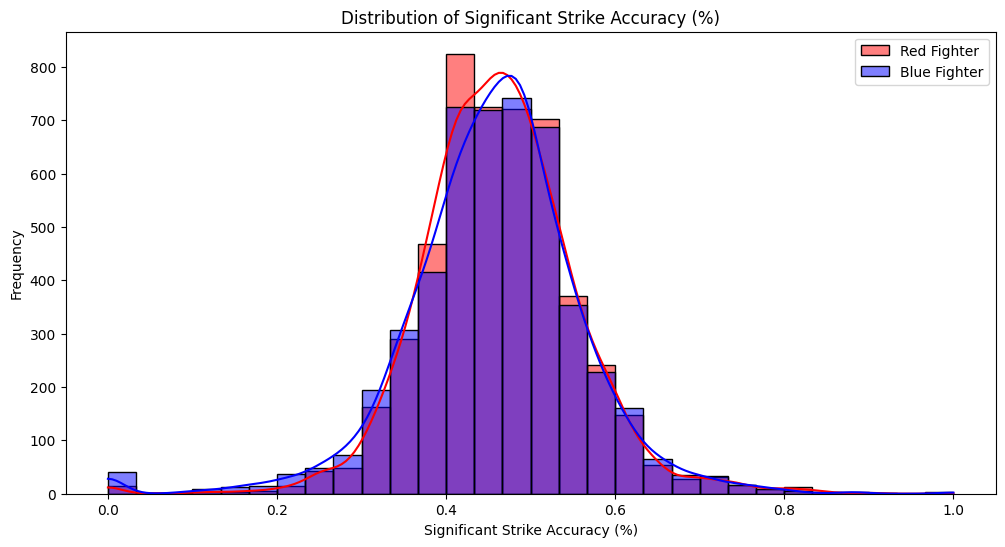

In [17]:


# Plotting Significant Strikes Landed
plt.figure(figsize=(12, 6))
sns.histplot(df['RedAvgSigStrLanded'], kde=True, color='red', label='Red Fighter', bins=30)
sns.histplot(df['BlueAvgSigStrLanded'], kde=True, color='blue', label='Blue Fighter', bins=30)
plt.title('Distribution of Significant Strikes Landed')
plt.xlabel('Significant Strikes Landed')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plotting Significant Strike Accuracy
plt.figure(figsize=(12, 6))
sns.histplot(df['RedAvgSigStrPct'], kde=True, color='red', label='Red Fighter', bins=30)
sns.histplot(df['BlueAvgSigStrPct'], kde=True, color='blue', label='Blue Fighter', bins=30)
plt.title('Distribution of Significant Strike Accuracy (%)')
plt.xlabel('Significant Strike Accuracy (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Grappling Statistics

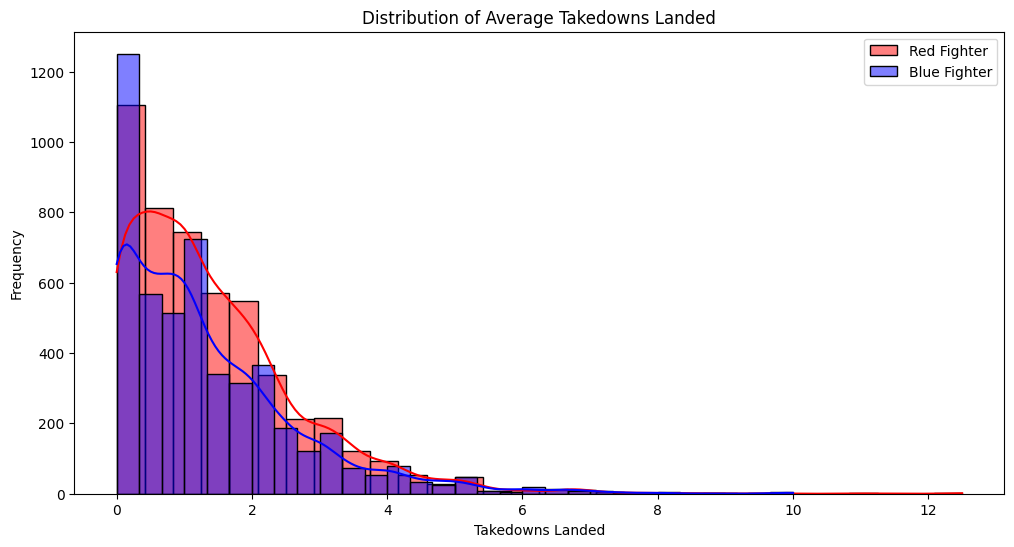

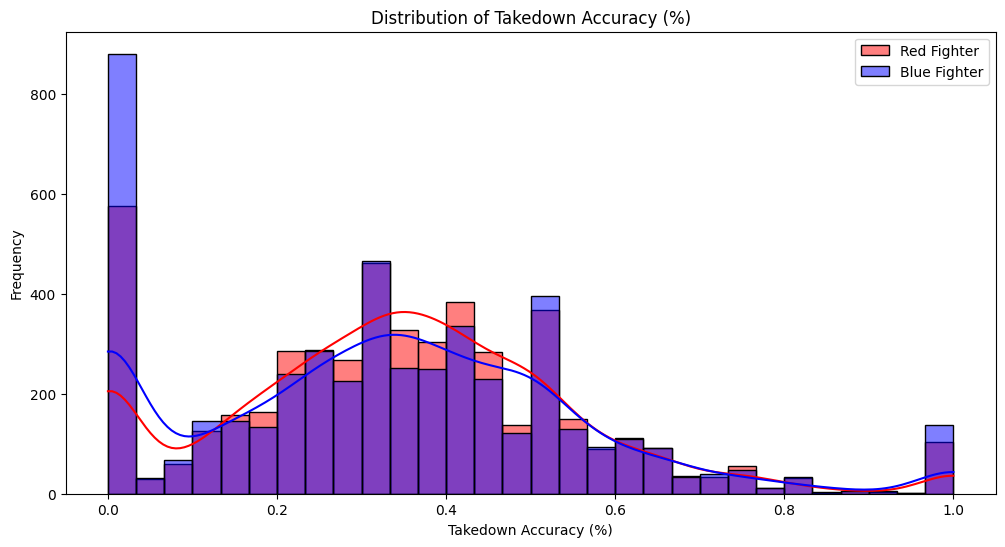

In [18]:
# Plotting Average Takedowns Landed
plt.figure(figsize=(12, 6))
sns.histplot(df['RedAvgTDLanded'], kde=True, color='red', label='Red Fighter', bins=30)
sns.histplot(df['BlueAvgTDLanded'], kde=True, color='blue', label='Blue Fighter', bins=30)
plt.title('Distribution of Average Takedowns Landed')
plt.xlabel('Takedowns Landed')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plotting Takedown Accuracy
plt.figure(figsize=(12, 6))
sns.histplot(df['RedAvgTDPct'], kde=True, color='red', label='Red Fighter', bins=30)
sns.histplot(df['BlueAvgTDPct'], kde=True, color='blue', label='Blue Fighter', bins=30)
plt.title('Distribution of Takedown Accuracy (%)')
plt.xlabel('Takedown Accuracy (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Attempted Submissions

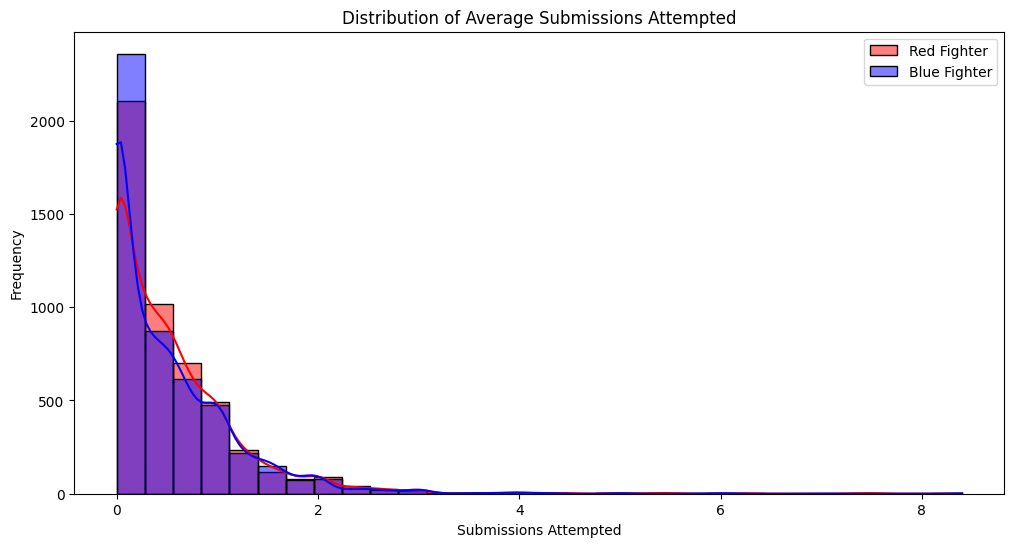

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df['RedAvgSubAtt'], kde=True, color='red', label='Red Fighter', bins=30)
sns.histplot(df['BlueAvgSubAtt'], kde=True, color='blue', label='Blue Fighter', bins=30)
plt.title('Distribution of Average Submissions Attempted')
plt.xlabel('Submissions Attempted')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Fighter Physical Attributes

In [23]:
def process_fighter_attribute(df, red_column, blue_column, attribute_name):
    # Extract and rename Red and Blue columns
    red_data = df[[f'RedFighter', red_column, 'Gender']].rename(
        columns={f'RedFighter': 'Fighter', red_column: attribute_name}
    )
    blue_data = df[[f'BlueFighter', blue_column, 'Gender']].rename(
        columns={f'BlueFighter': 'Fighter', blue_column: attribute_name}
    )
    # Concatenate and remove duplicates
    combined_data = pd.concat([red_data, blue_data], ignore_index=True).drop_duplicates(ignore_index=True)
    return combined_data

# Process height, weight, and reach
fighter_height = process_fighter_attribute(df, 'RedHeightCms', 'BlueHeightCms', 'Height')
fighter_weight = process_fighter_attribute(df, 'RedWeightLbs', 'BlueWeightLbs', 'Weight')
fighter_reach = process_fighter_attribute(df, 'RedReachCms', 'BlueReachCms', 'Reach')


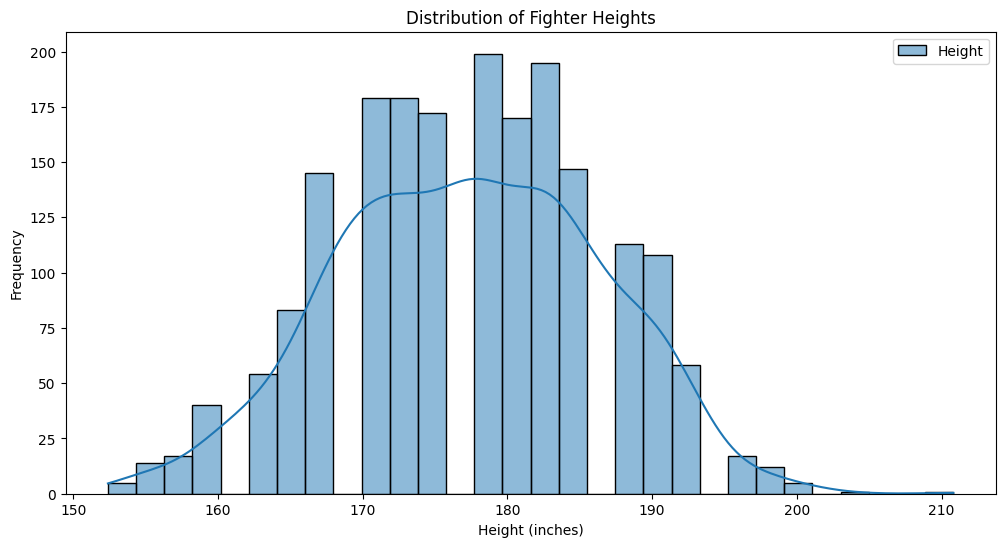

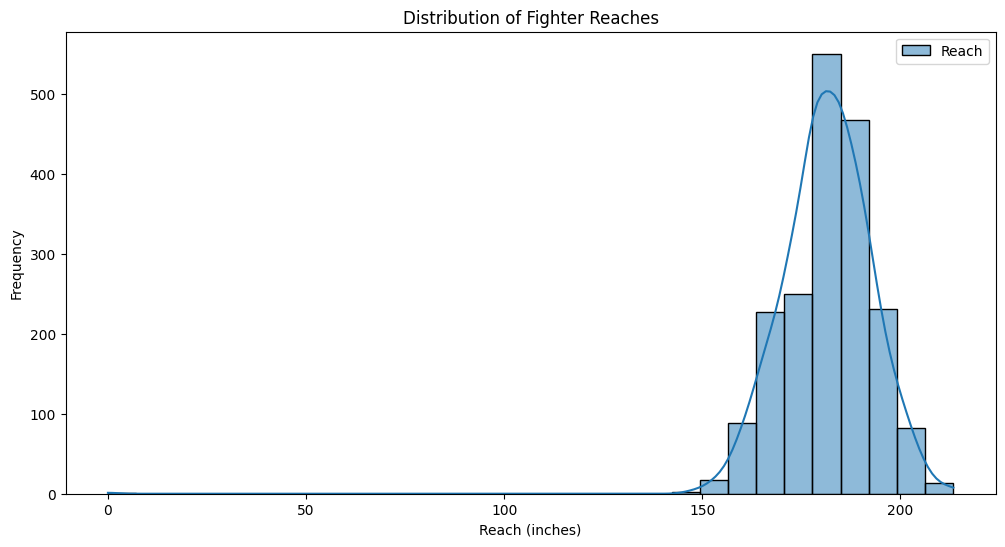

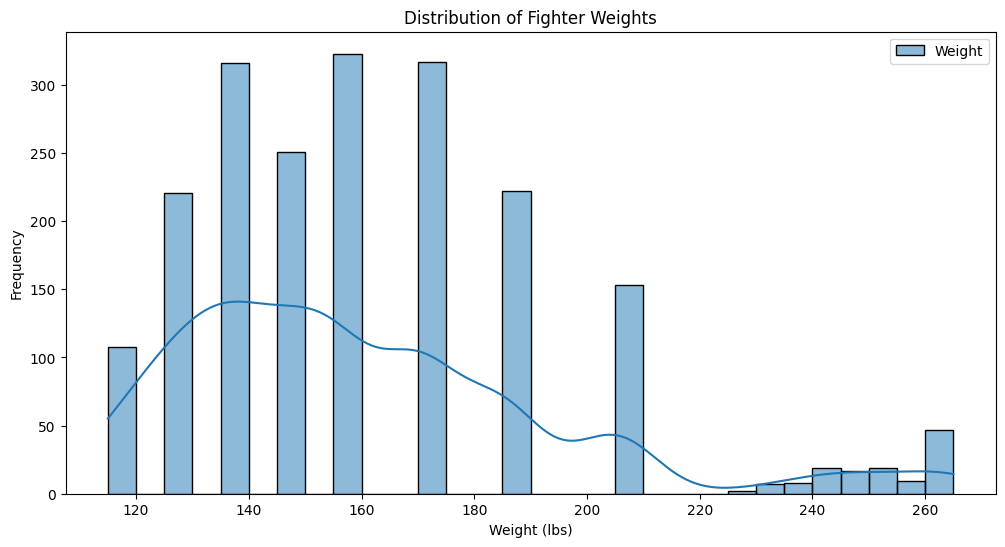

In [26]:
# Plotting Height
plt.figure(figsize=(12, 6))
sns.histplot(fighter_height, kde=True, color='green', bins=30)
plt.title('Distribution of Fighter Heights')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()

# Plotting Reach
plt.figure(figsize=(12, 6))
sns.histplot(fighter_reach, kde=True, color='orange', bins=30)
plt.title('Distribution of Fighter Reaches')
plt.xlabel('Reach (inches)')
plt.ylabel('Frequency')
plt.show()

# Plotting Weight
plt.figure(figsize=(12, 6))
sns.histplot(fighter_weight, kde=True, color='blue', bins=30)
plt.title('Distribution of Fighter Weights')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.show()


In [27]:
# Remove outleir fighter wiht low reach
df = df[~((df['RedFighter'] == 'Irwin Rivera') | (df['BlueFighter'] == 'Irwin Rivera'))]

# Multivariate Analysis

# Betting Odds Vs Fight Outcome

/var/folders/g7/d5vdjz6s1vl8ksk5tqs00s_c0000gn/T/ipykernel_50905/3537726160.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=betting_data, x='Outcome', y='BettingOdds', palette='coolwarm')


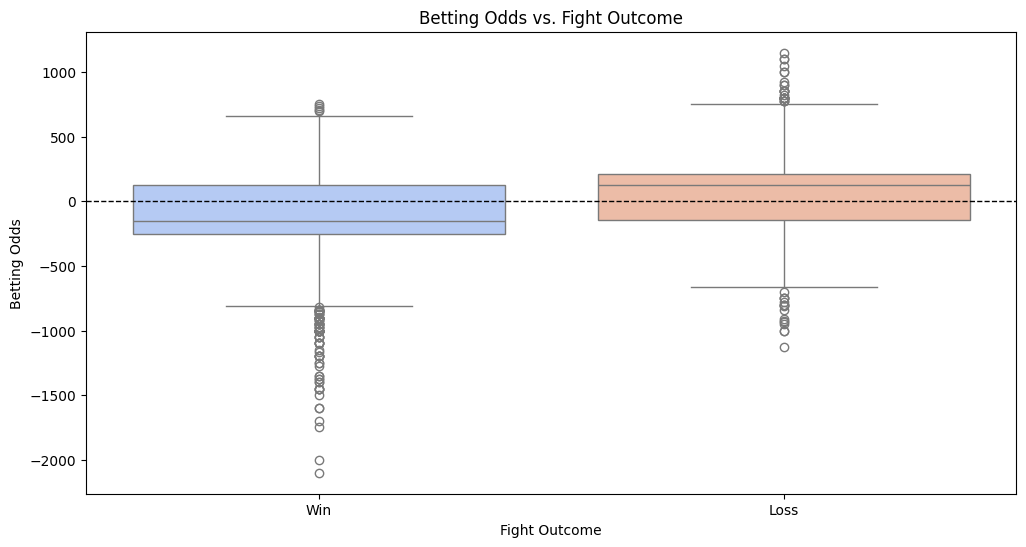

In [30]:
# Reshape betting odds for both fighters and outcomes
betting_data = pd.DataFrame({
    'BettingOdds': pd.concat([df['RedOdds'], df['BlueOdds']]),
    'Outcome': pd.concat([df['Winner'].replace('Red', 'Win').replace('Blue', 'Loss'),
                          df['Winner'].replace('Blue', 'Win').replace('Red', 'Loss')])
})

# Plot the distribution of betting odds by outcome
plt.figure(figsize=(12, 6))
sns.boxplot(data=betting_data, x='Outcome', y='BettingOdds', palette='coolwarm')
plt.title('Betting Odds vs. Fight Outcome')
plt.ylabel('Betting Odds')
plt.xlabel('Fight Outcome')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()


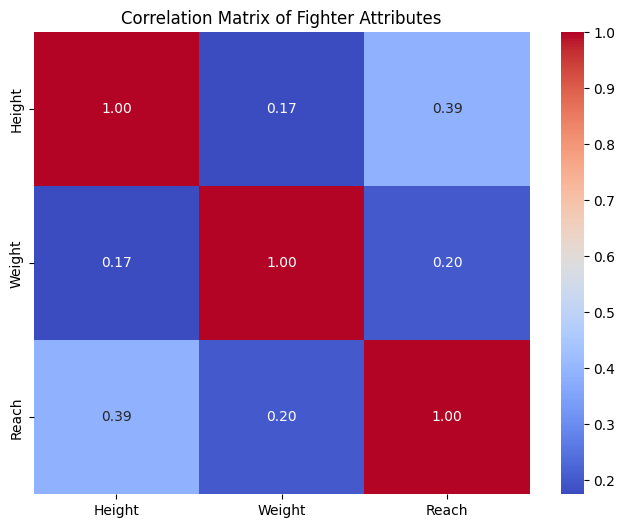

In [36]:
# Compute and plot correlation matrix
plt.figure(figsize=(8, 6))
attributes_data = pd.concat([fighter_height['Height'],
                             fighter_weight['Weight'], fighter_reach['Reach']], axis=1)
correlation_matrix = attributes_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Fighter Attributes')
plt.show()


# Age Win rate distribution

/var/folders/g7/d5vdjz6s1vl8ksk5tqs00s_c0000gn/T/ipykernel_50905/250369509.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_win_rate = combined_age_data.groupby(['Gender', 'AgeGroup'])['Win'].mean().unstack() * 100


<Figure size 1200x800 with 0 Axes>

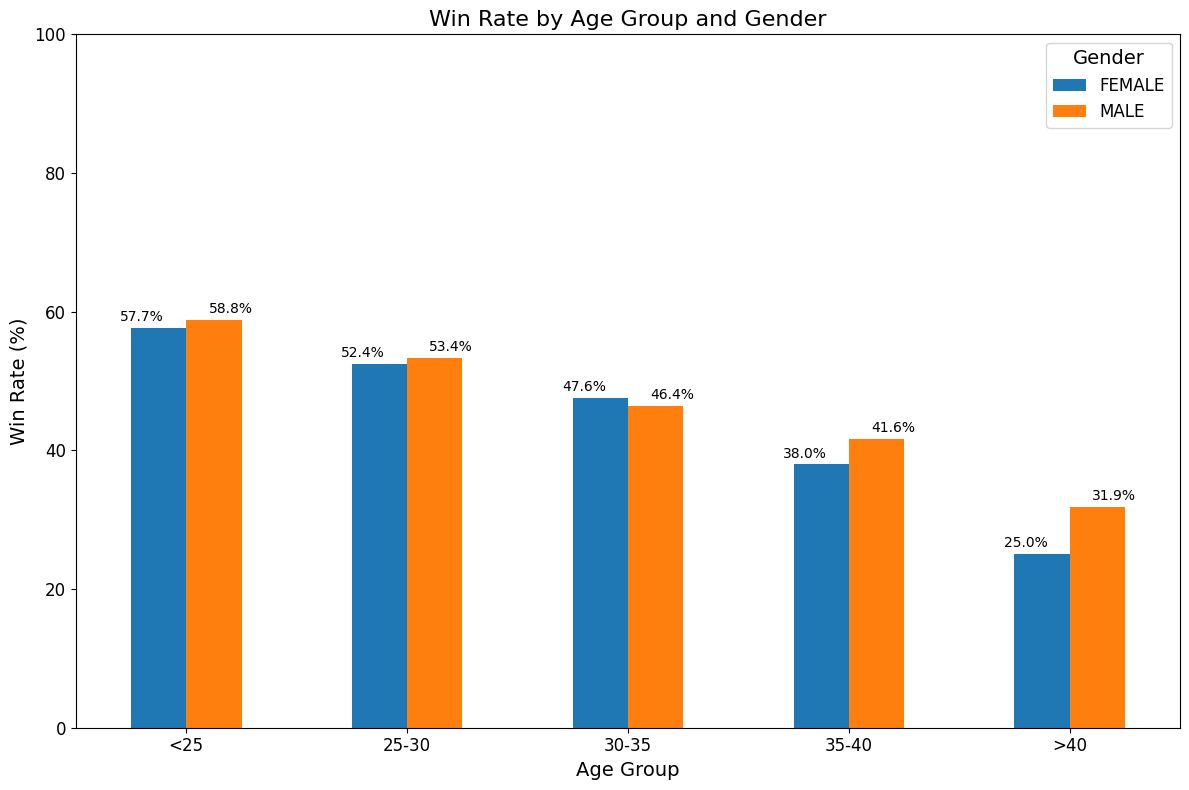

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Add fight outcomes mapped to Red and Blue fighters
df['RedWin'] = (df['Winner'] == 'Red').astype(int)
df['BlueWin'] = (df['Winner'] == 'Blue').astype(int)

# Combine age and outcomes into a single DataFrame for both fighters
red_data = df[['RedFighter', 'RedAge', 'RedWin']].rename(columns={'RedFighter': 'Fighter', 'RedAge': 'Age', 'RedWin': 'Win'})
blue_data = df[['BlueFighter', 'BlueAge', 'BlueWin']].rename(columns={'BlueFighter': 'Fighter', 'BlueAge': 'Age', 'BlueWin': 'Win'})
red_data['Gender'] = df['Gender']
blue_data['Gender'] = df['Gender']
combined_age_data = pd.concat([red_data, blue_data], ignore_index=True)


# Group by gender and age group
age_bins = [0, 25, 30, 35, 40, 100]  # Define age bins
age_labels = ['<25', '25-30', '30-35', '35-40', '>40']
combined_age_data['AgeGroup'] = pd.cut(combined_age_data['Age'], bins=age_bins, labels=age_labels)

# Calculate win rate for each gender and age group
gender_age_win_rate = combined_age_data.groupby(['Gender', 'AgeGroup'])['Win'].mean().unstack() * 100

# Plot win rate by age group and gender
plt.figure(figsize=(12, 8))
gender_age_win_rate.T.plot(kind='bar', figsize=(12, 8), color=['#1f77b4', '#ff7f0e'])

# Customize plot
plt.title('Win Rate by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Win Rate (%)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12, title_fontsize=14)
plt.ylim(0, 100)

# Annotate bars with percentages
for i, age_group in enumerate(gender_age_win_rate.columns):  # Iterate over Age Groups
    for gender in gender_age_win_rate.index:                 # Iterate over Genders
        rate = gender_age_win_rate.loc[gender, age_group]
        plt.text(
            i + (0.2 if gender == 'MALE' else -0.2),         # Offset for Male/Female
            rate + 1, f'{rate:.1f}%', ha='center', fontsize=10
        )

plt.tight_layout()
plt.show()



# Fight Frequencies

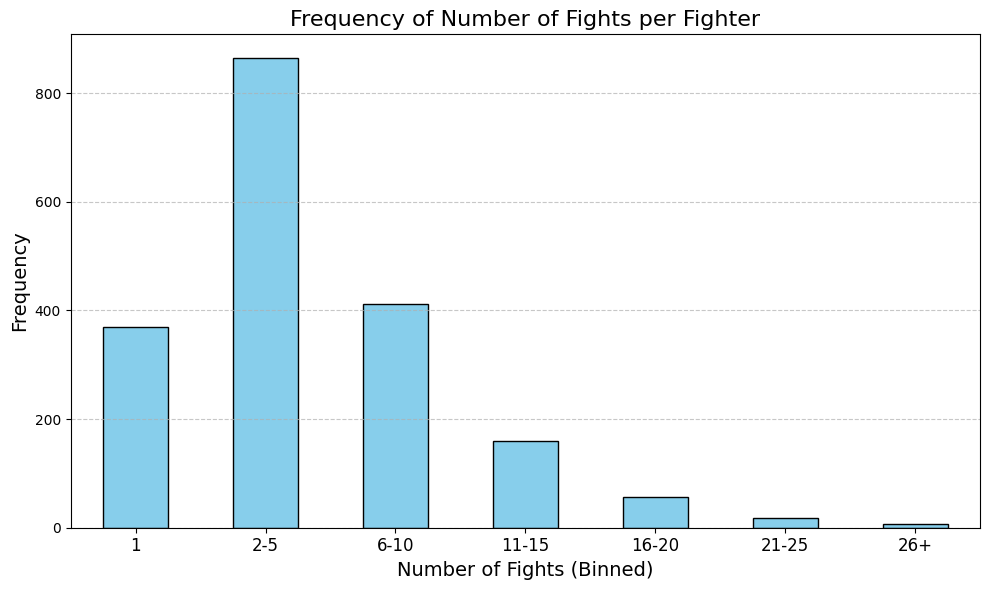

In [45]:
# Count the number of fights for each fighter
fighter_fight_counts = all_fighters.value_counts()

# Define the bins according to your ranges
bins = [0, 1, 5, 10, 15, 20, 25, fighter_fight_counts.max() + 1]

# Define custom labels
bin_labels = ['1', '2-5', '6-10', '11-15', '16-20', '21-25', '26+']

# Bin the fight counts
binned_fight_counts = pd.cut(fighter_fight_counts, bins=bins, labels=bin_labels, right=True)

# Count the frequencies in each bin
bin_frequencies = binned_fight_counts.value_counts().sort_index()

# Plot the results
plt.figure(figsize=(10, 6))
bin_frequencies.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Number of Fights per Fighter', fontsize=16)
plt.xlabel('Number of Fights (Binned)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
